In [22]:
import pandas as pd
import difflib
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox, Label
from networkx.readwrite import json_graph
import ipywidgets as widgets
import json

import RecommendationSystem as rs
import NetworkBuilder as nb

pd.set_option('display.max_colwidth', -1)

datasets = pd.read_json('data/train_test/data_sets.json')
publications = pd.read_json('data/train_test/publications.json')
datasets['title_lower'] = datasets['title'].str.lower()
publications['title_lower'] = publications['title'].str.lower()

def readNX(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

G = nb.buildG()
# G = nb.addCommunity(G)
# G = readNX('data/network_v2.5_contract.json')

In [23]:
G

In [ ]:
import NetworkBuilder

In [28]:
import operator
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
category = ['Keyword', 'Dataset', 'Publication Paper']
metric = ['Cosine', 'Jaccard', 'Adamic-Adar', 'Hopcroft']

def coverage(G, num_sample = 1000, plot = True, metric = 'Jaccard', category = 'Dataset', random_seed = 123):
    '''
    for each sampled dataset node and publication node,
        count top 10 recommendations and add to list
    groupby dataset node, to see how many each dataset was recommended
    get row length divided by sum of dataset nodes (10,348)
    return coverage number
    '''
    allDatasets = [i for i in G.nodes if(str(i).startswith('data_'))]
    #allPubs = [i for i in G.nodes if(str(i).startswith('pub_'))]

    np.random.seed(random_seed)
    rec_dict = {d:0 for d in allDatasets}
    rec_idx = np.random.randint(0,len(allDatasets),num_sample)
    none_list = []
    
    
    start_time = time.clock()
    for i in rec_idx:     #change after getting real rec
        rec = rs.getRecommendations(category, allDatasets[i], metric, G) #getRecommendations(allDatasets[i], G, metric)
        if type(rec) is not pd.DataFrame:
            none_list.append(allDatasets[i])
            pass
        else:
            for d in rec.data_set_id:
                rec_dict['data_'+str(d)] += 1
    
    top10_cov = sorted(rec_dict.items(), key=operator.itemgetter(1), reverse = True)[:10]
    cov_values = [v for k, v in rec_dict.items()]
    runtime = round(time.clock()-start_time, 2)
    print(top10_cov)
    print("Metric: %s"%metric)
    print("Number of zero recommendation datasets: {}".format(len(none_list)))
    print("Total Runtime : %ss"%runtime)
    if plot:
        plt.figure(figsize=(10,5))
        plt.hist(cov_values, bins = max(cov_values))
        plt.title("Recommendation Coverage | Metric = %s"%metric)
        plt.xlabel("Recommendation Count")
        plt.ylabel("Frequency")
    
    return rec_dict, none_list, runtime

data_750
data_4274
data_3562
data_3736
data_1169
data_5755
data_1949
data_1284
data_3809
data_8666
data_2925
data_5242
data_3488
data_3449
data_8564
data_8095
data_929
data_10286
data_8995
data_6541
data_8306
data_8999
data_5227
data_1838
data_3562
data_7183
data_8992
data_10065
data_5106
data_9608
data_6876
data_9304
data_8347
data_5305
data_9393
data_6314
data_8193
data_4215
data_7198
data_4315
data_10152
data_9172
data_210
data_9858
data_1353
data_8175
data_1221
data_1043
data_5144
data_3708
data_6778
data_7236
data_2238
data_8749
data_9304
data_439
data_2522
data_4912
data_3254
data_3753
data_5185
data_7892
data_5502
data_1383
data_7323
data_3467
data_10039
data_3419
data_3616
data_8773
data_8268
data_4769
data_6854
data_4325
data_3296
data_9598
data_5122
data_8072
data_1050
data_4813
data_1348
data_9196
data_5624
data_5237
data_10042
data_6975
data_3384
data_7513
data_5672
data_8861
data_5181
data_5594
data_5252
data_2949
data_8616
data_3381
data_1882
data_5043
data_8534
data_9668

NameError: name 'allDatasets' is not defined

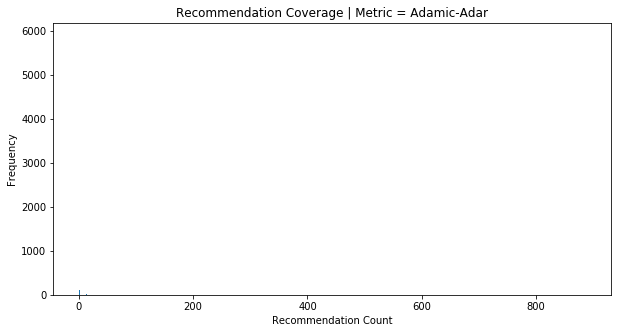

In [29]:
rec_dict_ada, none_list_ada, runtime_ada = coverage(G, num_sample = 1000, plot = True, metric = 'Adamic-Adar', category = 'Dataset', random_seed = 123)
coverage_ada = 1-sum([1 for k,v in rec_dict_ada.items() if v == 0])/len(allDatasets)
print("Coverage of Adamic-Adar method: ", coverage_cos)

In [31]:
allDatasets = [i for i in G.nodes if(str(i).startswith('data_'))]
coverage_ada = 1-sum([1 for k,v in rec_dict_ada.items() if v == 0])/len(allDatasets)
print("Coverage of Adamic-Adar method: ", coverage_ada)

Coverage of Adamic-Adar method:  0.03157894736842104


In [ ]:
rec_dict_jac, none_list_jac, runtime_jac = coverage(G, num_sample = 1000, plot = True, metric = 'Jaccard', category = 'Dataset', random_seed = 123)
coverage_jac = 1-sum([1 for k,v in rec_dict_jac.items() if v == 0])/len(allDatasets)
print("Coverage of jacmic-jacr method: ", coverage_jac)